In [1]:
import numpy as np
import pandas as pd
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
bd1 = np.load('./dataset/seq_bathroom_1714007389.npy')
bd3 = np.load('./dataset/0_seq_bathroom.npy')
# 두 데이터셋을 합치기
bathroom = np.concatenate((bd1, bd3), axis=0)

In [3]:
sd1 = np.load('./dataset/seq_scissors_1714010055.npy')
sd3 = np.load('./dataset/1_seq_scissors.npy')

scissors=np.concatenate((sd1, sd3), axis = 0)

In [4]:
rd1 = np.load('./dataset/2_seq_rainbow.npy')
rd2 = np.load('./dataset/seq_rainbow_1714013879.npy')

rainbow = np. concatenate((rd1, rd2), axis = 0)

In [5]:
gd1 = np.load('./dataset/3_seq_ginseng.npy')
gd2 = np.load('./dataset/seq_ginseng_1714013922.npy')

ginseng = np.concatenate((gd1, gd2), axis = 0)

In [6]:
md1 = np.load('./dataset/4_seq_mountain.npy')
md2 = np.load('./dataset/seq_mountain_1714013963.npy')

mountain = np.concatenate((md1, md2), axis = 0)

In [7]:
gr1 = np.load('./dataset/5_seq_girl.npy')
gr2 = np.load('./dataset/seq_girl_1714014003.npy')

girl = np.concatenate ((gr1, gr2), axis = 0)

In [8]:
std1 = np.load('./dataset/6_seq_sometimes.npy')
std2 = np.load('./dataset/seq_sometimes_1714014045.npy')

sometimes = np.concatenate ((std1, std2), axis =0)

In [9]:
nd1 = np.load('./dataset/7_seq_nineteen.npy')
nd2 = np.load('./dataset/seq_nineteen_1714014092.npy')

nineteen = np.concatenate ((nd1, nd2), axis = 0)

In [10]:
rmd1 = np.load('./dataset/8_seq_remote.npy')
rmd2 = np.load('./dataset/seq_remote_1714014135.npy')

remote = np.concatenate ((rmd1, rmd2), axis = 0)

In [11]:
rjd1 = np.load('./dataset/9_seq_reject.npy')
rjd2 = np.load('./dataset/seq_reject_1714014979.npy')

reject = np.concatenate((rjd1, rjd2), axis =0)

In [12]:
actions = [
    'bathroom',
    'scissors',
    'rainbow',
    'ginseng',
    'mountain',
    'girl',
    'sometimes',
    'nineteen',
    'remote',
    'reject'
]

data = np.concatenate([
    bathroom,
    scissors,
    rainbow,
    ginseng,
    mountain,
    girl,
    sometimes,
    nineteen,
    remote,
    reject
], axis=0)

data.shape

(7325, 30, 100)

In [13]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(7325, 30, 99)
(7325,)


In [14]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(7325, 10)

In [15]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(6592, 30, 99) (6592, 10)
(733, 30, 99) (733, 10)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

c:\Users\tj\anaconda3\envs\cv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        41,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,394 (173.41 KB)

 Trainable params: 44,394 (173.41 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[
        ModelCheckpoint('models/test.keras', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/50
204/206 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.1687 - loss: 54.9580
Epoch 1: val_acc improved from -inf to 0.53070, saving model to models/test.keras
206/206 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - acc: 0.1704 - loss: 54.6021 - val_acc: 0.5307 - val_loss: 6.8735 - learning_rate: 0.0010
Epoch 2/50
202/206 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5689 - loss: 8.0213
Epoch 2: val_acc did not improve from 0.53070
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.5674 - loss: 8.5258 - val_acc: 0.0832 - val_loss: 138.9322 - learning_rate: 0.0010
Epoch 3/50
202/206 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3762 - loss: 50.9229
Epoch 3: val_acc did not improve from 0.53070
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.3780 - loss: 50.2565 - val_acc: 0.4584 - val_loss: 5.1536 - learning_rate: 0.0010
Epoch 4/50
202/206 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5072 - loss: 2.5321
Epoch 4: val_acc improved from 0.53070 to 0.54297, saving model to models/test.keras
206/206 ━━━━━━━━━

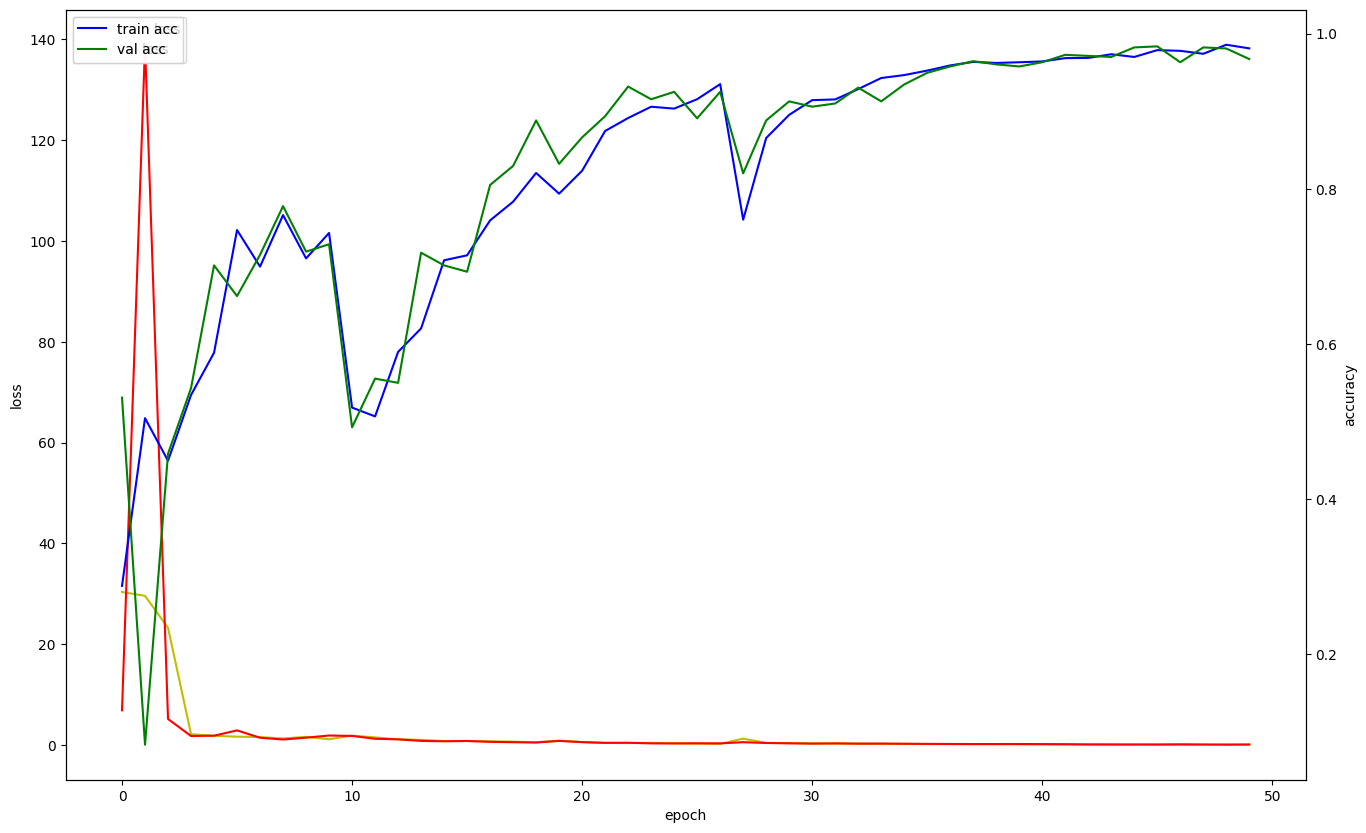

In [18]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [19]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/test.keras')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


array([[[625,   0],
        [  0, 108]],

       [[668,   0],
        [  0,  65]],

       [[661,   0],
        [  1,  71]],

       [[695,   0],
        [  0,  38]],

       [[666,   0],
        [  0,  67]],

       [[707,   0],
        [  0,  26]],

       [[640,   1],
        [  0,  92]],

       [[648,   0],
        [  0,  85]],

       [[644,   9],
        [  1,  79]],

       [[631,   2],
        [ 10,  90]]], dtype=int64)